In [53]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [57]:
df6012 = web.DataReader('6012.KL', data_source='yahoo', start='2011-03-12',end='2020-03-12')

In [58]:
df6012['Difference'] = df6012['Open'] - df6012['Close']
df6012.head()

,High,Low,Open,Close,Volume,Adj Close,Difference
Date,,,,,,,
2011-03-14,5.41,5.35,5.40,5.39,3479700.0,3.575402,0.01
2011-03-15,5.39,5.36,5.38,5.37,4481900.0,3.562135,0.01
2011-03-16,5.38,5.34,5.36,5.36,4017800.0,3.555503,0.00
2011-03-17,5.36,5.33,5.35,5.35,3148300.0,3.548868,0.00
2011-03-18,5.40,5.34,5.35,5.40,3830400.0,3.582035,-0.05


In [59]:
df6012.tail()

,High,Low,Open,Close,Volume,Adj Close,Difference
Date,,,,,,,
2020-03-06,5.45,5.36,5.37,5.43,1813100.0,5.43,-0.06
2020-03-09,5.46,5.30,5.38,5.31,3013200.0,5.31,0.07
2020-03-10,5.37,5.25,5.29,5.25,3148600.0,5.25,0.04
2020-03-11,5.31,5.21,5.27,5.27,3875400.0,5.27,0.00
2020-03-12,5.31,5.20,5.25,5.25,2038200.0,5.25,0.00


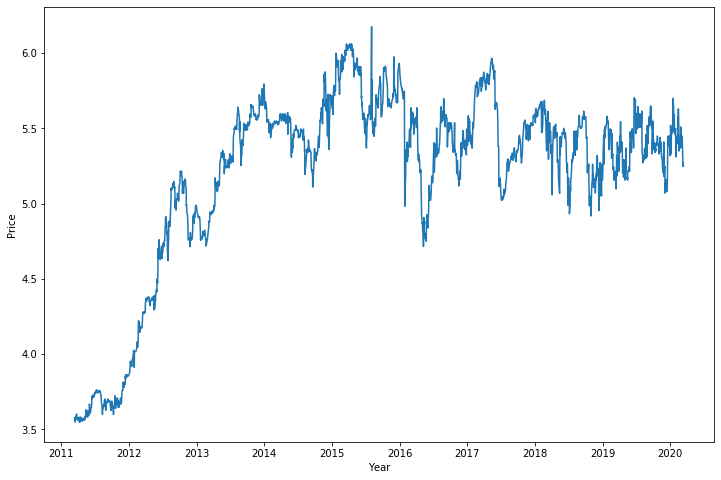

In [5]:
plt.figure(figsize = (12,8))
plt.plot(df6012['Adj Close'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [6]:
df6012.to_csv('maxis.csv')

In [7]:
dfPre = []
dfPre = df6012[['Adj Close']]

In [8]:
print(dfPre.head())

            Adj Close
Date                 
2011-03-14   3.575402
2011-03-15   3.562135
2011-03-16   3.555503
2011-03-17   3.548868
2011-03-18   3.582035


In [9]:
forecast_out = 30 #predict n days into the future, in this case, 30
dfPre['Prediction'] = dfPre[['Adj Close']].shift(-forecast_out)
print(dfPre.head())

            Adj Close  Prediction
Date                             
2011-03-14   3.575402    3.555503
2011-03-15   3.562135    3.562135
2011-03-16   3.555503    3.568769
2011-03-17   3.548868    3.562135
2011-03-18   3.582035    3.562135


C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
X = np.array(dfPre.drop(['Prediction'], 1))
len(X)

2225

In [11]:
#reserving 60 data for testing
X_new = X[0:2165]
len(X_new) + 60

2225

In [12]:
X_new[0:10]

array([[3.57540226],
       [3.56213546],
       [3.55550337],
       [3.54886842],
       [3.5820353 ],
       [3.56876922],
       [3.56876922],
       [3.56876922],
       [3.60193563],
       [3.5820353 ]])

In [13]:
y = np.array(dfPre['Prediction'])
y_new = y[:-60]
len(y_new)

2165

In [14]:
y_new[0:10]

array([3.55550337, 3.56213546, 3.56876922, 3.56213546, 3.56213546,
       3.57540226, 3.56876922, 3.56876922, 3.56213546, 3.56876922])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2)

In [16]:
y = np.array(dfPre['Prediction'])
y = y[:-forecast_out]
print(y)
len(y)

[3.55550337 3.56213546 3.56876922 ... 5.25       5.26999998 5.25      ]


2195

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pre = lr.predict(X[2195:2225])
print("Predicted last 30 days")
print(y_pre)

Predicted last 30 days
[5.31948348 5.36330478 5.43341853 5.43341853 5.39836165 5.44218254
 5.40712566 5.39836165 5.55611759 5.48600384 5.59993889 5.4684754
 5.35454035 5.37206879 5.39836165 5.43341853 5.38959722 5.44218254
 5.37206879 5.49476827 5.4246541  5.44218254 5.38083322 5.44218254
 5.38083322 5.4246541  5.31948348 5.26689816 5.2844266  5.26689816]


In [19]:
confidence = lr.score(X_test, y_test)
print("Confidence Score: ", confidence)

Confidence Score:  0.8689569171049669


In [20]:
x_forecast = np.array(dfPre.drop(['Prediction'], 1))[-forecast_out:]
print("Actual last 30 days: ")
print(x_forecast)

Actual last 30 days: 
[[5.30999994]
 [5.36000013]
 [5.44000006]
 [5.44000006]
 [5.4000001 ]
 [5.44999981]
 [5.40999985]
 [5.4000001 ]
 [5.57999992]
 [5.5       ]
 [5.63000011]
 [5.48000002]
 [5.3499999 ]
 [5.36999989]
 [5.4000001 ]
 [5.44000006]
 [5.38999987]
 [5.44999981]
 [5.36999989]
 [5.51000023]
 [5.42999983]
 [5.44999981]
 [5.38000011]
 [5.44999981]
 [5.38000011]
 [5.42999983]
 [5.30999994]
 [5.25      ]
 [5.26999998]
 [5.25      ]]


Text(0, 0.5, 'Price')

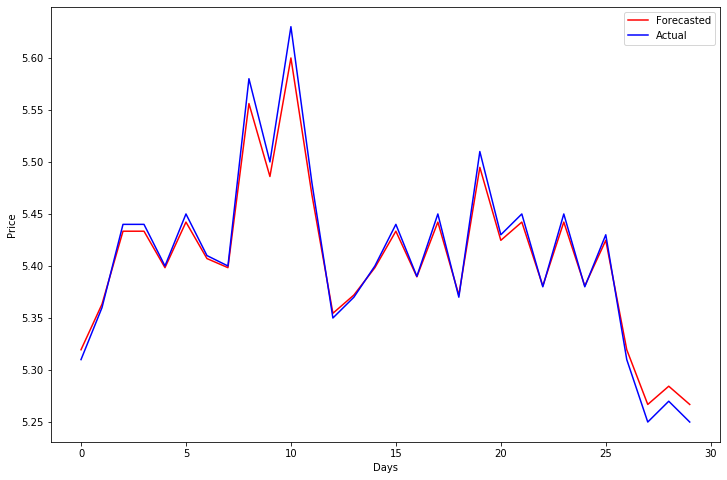

In [21]:
plt.figure(figsize = (12,8))
plt.plot(y_pre, color='r')
plt.plot(x_forecast, color='b')
plt.legend(['Forecasted', 'Actual'])
plt.xlabel("Days")
plt.ylabel("Price")

In [48]:
print("Mean Squared Error: ", metrics.mean_squared_error(y_pre, x_forecast))

Mean Squared Error:  0.00011611224546441332


In [49]:
y_pre2 = [] 
y_pre2.append(np.array(y_pre))
for x in range(11):
    y_pre_alt = y_pre2[x]
    y_pre_in = lr.predict(y_pre_alt.reshape(-1, 1))
    y_pre2.append(np.array(y_pre_in))

In [69]:
forward = []
for x in y_pre2:
    for y in x:
        forward.append(y)

print(y_pre2)
print(forward)

[array([5.31948348, 5.36330478, 5.43341853, 5.43341853, 5.39836165,
       5.44218254, 5.40712566, 5.39836165, 5.55611759, 5.48600384,
       5.59993889, 5.4684754 , 5.35454035, 5.37206879, 5.39836165,
       5.43341853, 5.38959722, 5.44218254, 5.37206879, 5.49476827,
       5.4246541 , 5.44218254, 5.38083322, 5.44218254, 5.38083322,
       5.4246541 , 5.31948348, 5.26689816, 5.2844266 , 5.26689816]), array([5.32779506, 5.36620104, 5.42765032, 5.42765032, 5.39692568,
       5.4353313 , 5.40460666, 5.39692568, 5.53518657, 5.47373728,
       5.57359255, 5.45837496, 5.3585197 , 5.37388202, 5.39692568,
       5.42765032, 5.38924434, 5.4353313 , 5.37388202, 5.48141863,
       5.41996898, 5.4353313 , 5.38156336, 5.4353313 , 5.38156336,
       5.41996898, 5.32779506, 5.2817081 , 5.29707042, 5.2817081 ]), array([5.33507952, 5.3687394 , 5.42259494, 5.42259494, 5.39566717,
       5.42932672, 5.40239895, 5.39566717, 5.51684214, 5.4629866 ,
       5.55050202, 5.44952271, 5.36200729, 5.37547118, 5.

Text(0, 0.5, 'Price')

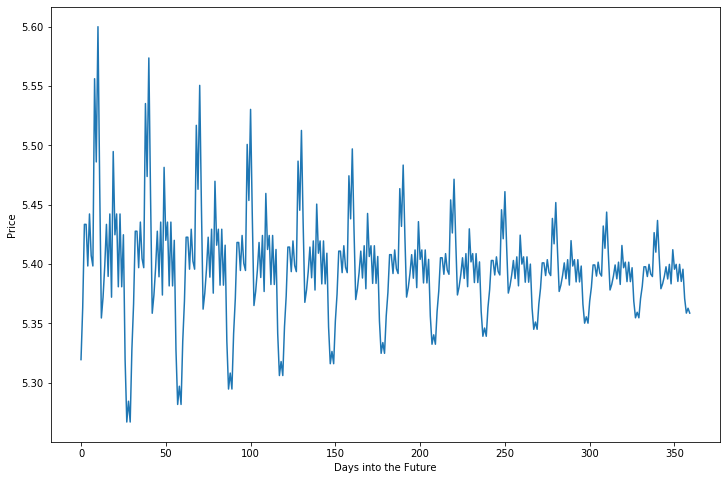

In [96]:
#The stock prices predicted from 1 day into the future, to 365 days into the future
plt.figure(figsize = (12,8))
plt.plot(forward)
plt.xlabel("Days into the Future")
plt.ylabel("Price")